In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [8]:
# Creating path to the csv file
trends_csv = Path("shopping_trends.csv")

# Reading CSV file as DataFrame
trends_df = pd.read_csv(trends_csv)
trends_df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [9]:
# Describing DataFrame
trends_df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [16]:
# Checking columns and data. It shows that there are no missing data and no null value
trends_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

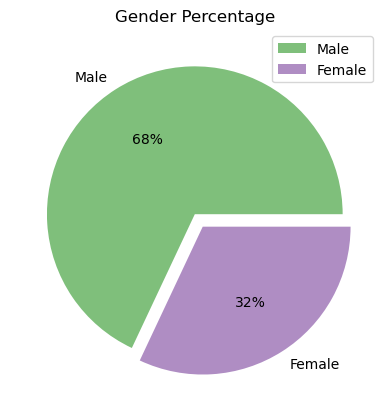

In [76]:
# Define colors for visualizaiton
colors = ['#7fbf7b', '#af8dc3', '#e5d8bd', '#f7b6d2']

# Checking the gender count
gender_count = trends_df['Gender'].value_counts()
explode = 0, 0.1

gender_count.plot(kind='pie',
                  autopct="%1.0f%%",
                  ylabel='',
                  explode = explode,
                  legend=True,
                  colors=colors,
                  title='Gender Percentage')

plt.show()

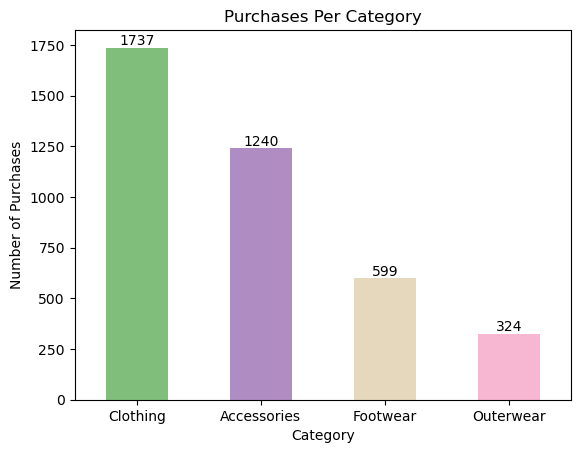

In [74]:
# Sales per category
category_sale = trends_df['Category'].value_counts()

category_sale.plot(kind='bar',
                   xlabel='Category',
                   ylabel='Number of Purchases',
                   legend=False,
                   title='Purchases Per Category',
                   color = colors,
                   )

# Annotate each bar with its count
for i, count in enumerate(category_sale):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.xticks(rotation=0)
plt.show()

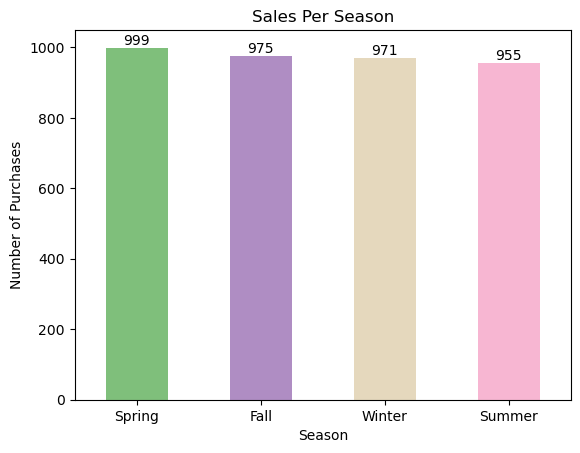

In [75]:
season_sale = trends_df['Season'].value_counts()

season_sale.plot(kind='bar',
                 title='Sales Per Season',
                 ylabel='Number of Purchases',
                 color=colors,
                 )

# Annotate each bar with its count
for i, count in enumerate(season_sale):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.xticks(rotation = 0)
plt.show()

In [125]:
season_sale

Season
Spring    999
Fall      975
Winter    971
Summer    955
Name: count, dtype: int64

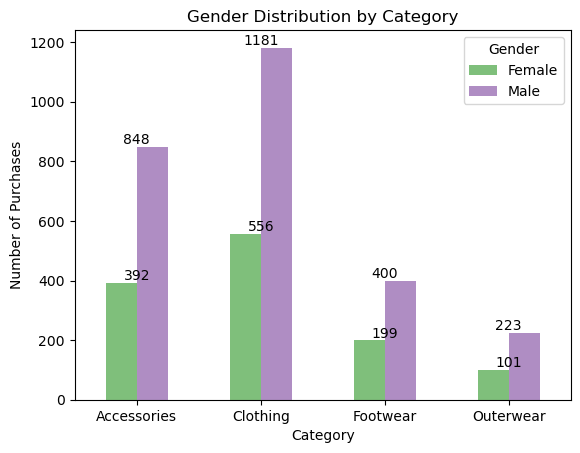

In [121]:
# Group by 'Category' and 'Gender' and count occurrences
category_gender_sale = trends_df.groupby(['Category', 'Gender']).size().unstack()

# Plotting the bar chart
category_gender_sale.plot(kind='bar',
                          stacked=False,
                          title='Gender Distribution by Category',
                          xlabel='Category',
                          ylabel='Number of Purchases',
                          color=colors,
                          )

# Annotate each bar with its count
for i, category in enumerate(category_gender_sale.index):
    for j, gender in enumerate(category_gender_sale.columns):
        count = category_gender_sale.loc[category, gender]
        plt.text(i, count, str(count), ha='center', va='bottom', color='black')

# Customizing the plot
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Gender')

# Show the plot
plt.show()

In [118]:
category_gender_sale


Category     Gender
Accessories  Female     392
             Male       848
Clothing     Female     556
             Male      1181
Footwear     Female     199
             Male       400
Outerwear    Female     101
             Male       223
dtype: int64